# Introdução

Faremos aqui uma análise exploratória dos dados sobre o _World Happiness Report_, a partir do seguinte _dataset_ do Kaggle. Fonte:
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

Dados sobre como cada variável é medida podem ser encontrados aqui:

https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf

O arquivo tem o valor medido pelo _World Happiness Report_, da _Gallup World Poll_, de vários indicadores quantitativos. Dentre eles, uma medida de felicidade (_Life Ladder_). O objetivo deste trabalho é fazer uma análise exploratória de tais dados, em particular analisando a situação do Brasil.

# Imports

Faremos aqui o *import* dos módulos a serem utilizados (ou não, pode haver *imports* supérfluos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Primeiro, vamos carregar os dados e selecionar os dados referentes ao Brasil.

In [6]:
df = pd.read_csv('world-happiness-report.csv')
df_br = df.loc[df['Country name'] == 'Brazil']

In [12]:
df_br

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
218,Brazil,2005,6.637,9.438,0.883,63.30,0.882,NaN,0.745,0.818,0.302
219,Brazil,2007,6.321,9.515,0.886,63.78,0.777,-0.016,0.728,0.859,0.299
220,Brazil,2008,6.691,9.555,0.878,64.02,0.782,-0.078,0.688,0.820,0.265
221,Brazil,2009,7.001,9.544,0.913,64.26,0.767,-0.055,0.723,0.833,0.274
222,Brazil,2010,6.837,9.607,0.906,64.50,0.806,-0.054,0.656,0.817,0.250
223,Brazil,2011,7.038,9.637,0.916,64.76,0.834,-0.072,0.662,0.807,0.268
224,Brazil,2012,6.660,9.647,0.890,65.02,0.849,NaN,0.623,0.755,0.350
225,Brazil,2013,7.140,9.668,0.910,65.28,0.785,-0.095,0.707,0.818,0.276
226,Brazil,2014,6.981,9.664,0.898,65.54,0.714,-0.115,0.710,0.788,0.274
227,Brazil,2015,6.547,9.620,0.907,65.80,0.799,-0.016,0.771,0.755,0.325


# Sobre o Índice de Felicidade

O índice é calculado como a média nacional, a cada ano, da resposta para a pergunta "Imagine uma escada com degraus numerados de 0 a 10, de forma crescente. O topo representa a melhor vida para você, e o degrau mais baixo, a pior. Em qual degrau você, pessoalmente, sente que se encontra?" (minha tradução livre do documento encontrado no começo deste projeto).

Observando o _dataframe_ referente aos dados do Brasil, vemos que já está ordenado, de forma crescente, com respeito aos anos. Vamos _plotar_ o valor de felicidade e o PIB per capita em função dos anos, para ver se enxergamos alguma tendência.

In [13]:
anos = df_br['year']
pib = df_br['Log GDP per capita']
felicidade = df_br['Life Ladder']

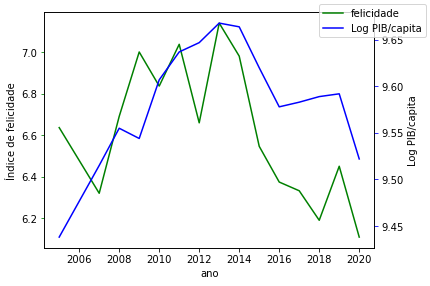

In [37]:
fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('ano')
ax1.set_ylabel('Índice de felicidade')
ax1.plot(anos, felicidade, color = color, label = 'felicidade')
ax1.tick_params(axis = 'y', color = color)

ax2 = ax1.twinx()

color = 'blue'
ax2.set_xlabel('ano')
ax2.set_ylabel('Log PIB/capita')
ax2.plot(anos, pib, color = color, label = 'Log PIB/capita')
ax2.tick_params(axis = 'y', color = color)


fig.legend(loc="upper right")
fig.tight_layout()
plt.show()


É possível perceber que, aproximadamente em 2013, a felicidade atinge seu pico, assim como o PIB _per capita_ (em dólares). A partir de então, o índice de felicidade têm uma queda brusca, assim como o PIB. Isso parece indicar que, até 2013, o PIB e o índice de felicidade estavam menos relacionados (em 2009, é possível observar um pico do índice de felicidade coincidindo com um vale do PIB _per capita_). 